# Reconstruction of 3D points and fixation on workspace

## Loading raw data

In [1]:
import random

# import
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import random
from utils.loading import load_patient_data, load_dataset
%load_ext autoreload
%autoreload 2

In [2]:
#plt.rcParams.update({'text.usetex': True, 'mathtext.fontset': 'stixsans'})
plt.rc('text', usetex=False)

In [3]:
lpr_path = Path("C:\_Ponts\MVA\Projet avec un médecin\Données Pierre-Louis\subset_lcr")
control_path = Path("C:\_Ponts\MVA\Projet avec un médecin\Données Pierre-Louis\subset_control")

In [219]:
data_patient = load_dataset(lpr_path, nrows=200000, csv=True, sep=';')
data_control = load_dataset(control_path, nrows=200000, csv=True, sep=';')

Loading subset_lcr dataset:  16%|█▌        | 4/25 [00:03<00:17,  1.18 files/s]c:\_Ponts\MVA\Projet avec un médecin\smartflat\notebooks\utils\loading.py:30: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset[name] = pd.read_csv(p, **pd_kwargs)
Loading subset_lcr dataset:  28%|██▊       | 7/25 [00:05<00:13,  1.30 files/s]c:\_Ponts\MVA\Projet avec un médecin\smartflat\notebooks\utils\loading.py:30: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset[name] = pd.read_csv(p, **pd_kwargs)
Loading subset_control dataset: 100%|██████████| 12/12 [00:11<00:00,  1.02 files/s]


In [220]:
list_patient = [key for key in data_patient.keys()]
list_control = [key for key in data_control.keys()]

In [68]:
data_patient[list_patient[0]][data_patient[list_patient[0]]["Eye movement type"] == "Fixation"]

,Recording timestamp,Gaze point X,Gaze point Y,Gaze point 3D X,Gaze point 3D Y,Gaze point 3D Z,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,...,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Gyro X,Gyro Y,Gyro Z,Accelerometer X,Accelerometer Y,Accelerometer Z
4,30014,967.0,608.0,"-15,8349","-20,0631","864,6438","-0,04705","0,01122","0,99883","0,0148",...,60,1,965.0,606.0,NaN,NaN,NaN,NaN,NaN,NaN
5,40006,965.0,608.0,"-14,2288","-20,0514","861,0445","-0,04854","0,00341","0,99882","0,01968",...,60,1,965.0,606.0,NaN,NaN,NaN,NaN,NaN,NaN
6,50021,965.0,607.0,"-14,7014","-19,854","873,6998","-0,04611","0,01017","0,99888","0,01658",...,60,1,965.0,606.0,NaN,NaN,NaN,NaN,NaN,NaN
7,60026,966.0,605.0,"-15,4689","-18,3921","895,816","-0,04809","0,00489","0,99883","0,01761",...,60,1,965.0,606.0,NaN,NaN,NaN,NaN,NaN,NaN
8,70021,965.0,604.0,"-14,8203","-17,9075","885,1","-0,04479","0,01351","0,99891","0,01533",...,60,1,965.0,606.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,339451544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,630,976,888.0,828.0,"-0,91","2,2949","-1,7277",NaN,NaN,NaN
99996,339452849,886.0,815.0,"20,018","-81,7564","400,3618","-0,02042","-0,14051","0,98987","0,11293",...,630,976,888.0,828.0,NaN,NaN,NaN,NaN,NaN,NaN
99997,339460543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,630,976,888.0,828.0,NaN,NaN,NaN,"0,1177","-9,4615","3,5098"
99998,339462114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,630,976,888.0,828.0,"-1,47","2,0516","-1,5574",NaN,NaN,NaN


### 2D plotting : example on one patient and one control

In [69]:
patient = list_patient[0]
control = list_control[0]

In [70]:
def get_fixation_df(data: pd.DataFrame, name: str):
    """Get the fixation points on the screen (in pixels)"""
    df = data[name][data[name]["Eye movement type"] == "Fixation"][["Recording timestamp", "Fixation point X", "Fixation point Y", "Gaze event duration"]].drop_duplicates(subset=["Fixation point X", "Fixation point Y"], keep="first")
    df["Time"] = df["Gaze event duration"].cumsum()
    df["Recording timestamp"] /= df["Recording timestamp"].max()
    return df

In [71]:
gaze_points_2D = get_fixation_df(data_patient, patient)

gaze_points_2D_control = get_fixation_df(data_control, control)

In [72]:
gaze_points_2D

,Recording timestamp,Fixation point X,Fixation point Y,Gaze event duration,Time
4,0.000089,965.0,606.0,60,60
57,0.000767,1032.0,545.0,140,200
147,0.001668,1219.0,539.0,160,360
225,0.002438,1157.0,550.0,170,530
290,0.003086,1050.0,596.0,410,940
...,...,...,...,...,...
99575,0.997578,1000.0,886.0,190,236460
99684,0.998666,970.0,830.0,80,236540
99717,0.998998,890.0,841.0,260,236800
99797,0.999802,876.0,838.0,60,236860


### 2D Plotting : comparison

In [11]:
from utils.plot import plot_patient_vs_control

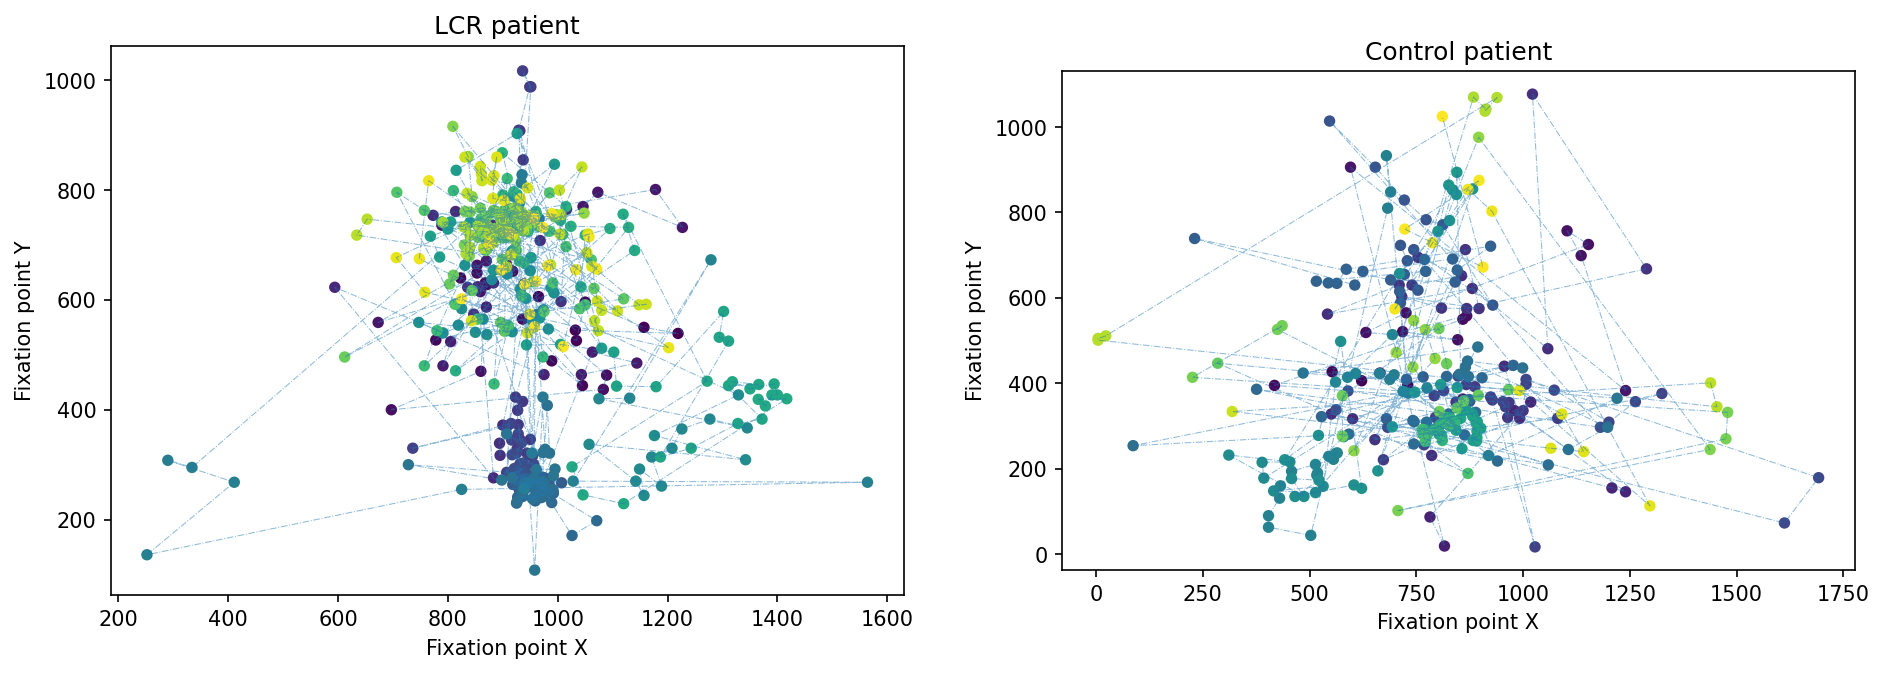

In [12]:
plot_patient_vs_control(gaze_points_2D, gaze_points_2D_control, show_lines=True)

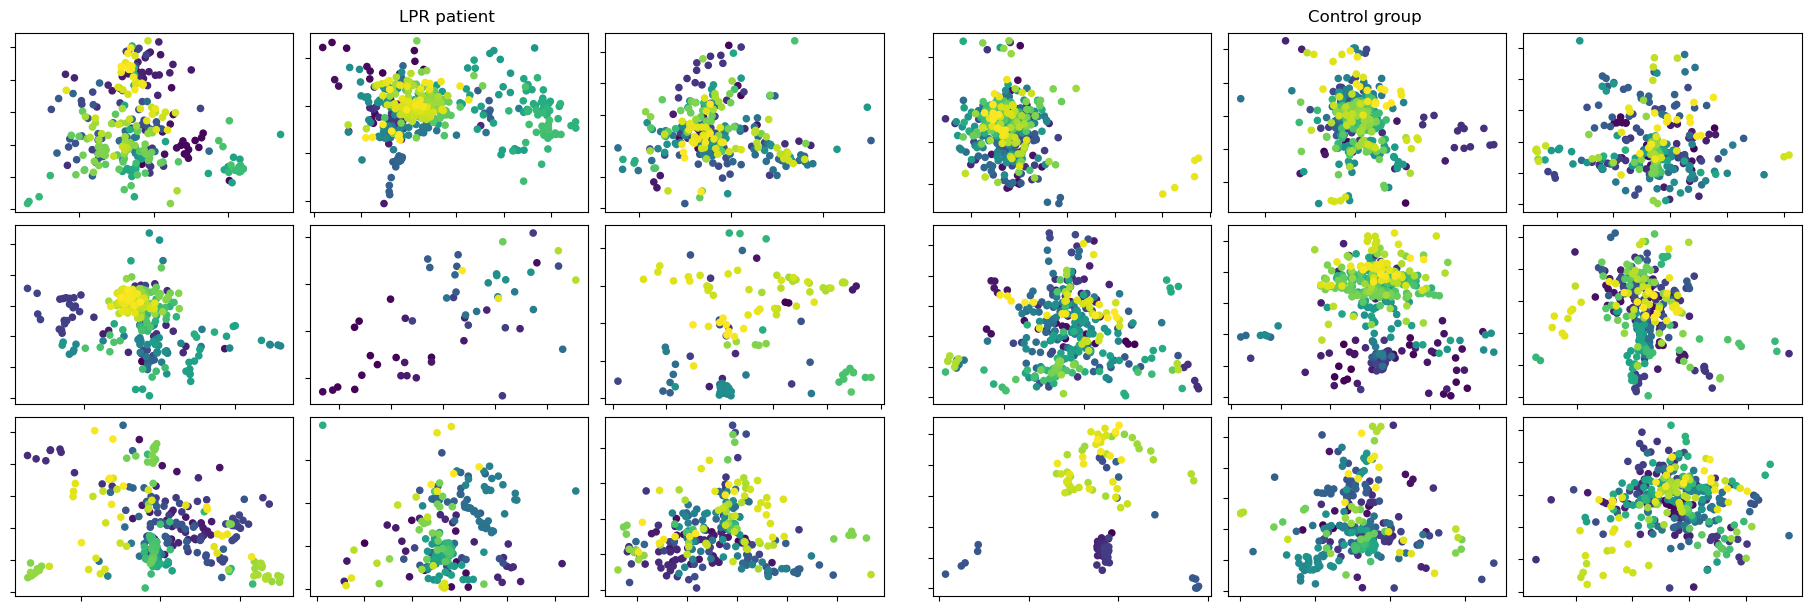

In [13]:
n_sample = 9
nrows = 3
ncols = n_sample // nrows
patients = random.sample(list_patient, n_sample)
controls = random.sample(list_control, n_sample)

fig = plt.figure(constrained_layout=True, figsize=(18,6))
subfigs = fig.subfigures(1, 2, wspace=0.04)

axsLeft = subfigs[0].subplots(nrows=nrows,ncols=ncols)
for i,axs in enumerate(axsLeft):
    for j,ax in enumerate(axs):
        gaze_points_2D = get_fixation_df(data_patient, patients[3*i+j])
        gaze_points_2D.plot.scatter(ax=ax, x="Fixation point X", y="Fixation point Y", c="Recording timestamp",cmap='viridis', colorbar=False)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticklabels([])
        ax.set_yticklabels([])
subfigs[0].suptitle("LPR patient")

axsRight = subfigs[1].subplots(nrows=nrows, ncols=ncols)
for i,axs in enumerate(axsRight):
    for j,ax in enumerate(axs):
        gaze_points_2D_control = get_fixation_df(data_control, controls[3*i+j])
        gaze_points_2D_control.plot.scatter(ax=ax, x="Fixation point X", y="Fixation point Y", c="Recording timestamp",cmap='viridis', colorbar=False)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticklabels([])
        ax.set_yticklabels([])
_ = subfigs[1].suptitle("Control group")

### 3D plotting

In [14]:
from matplotlib import cm

In [15]:
gaze_points_3D = data_patient[patient][["Recording timestamp", "Gaze point 3D X", "Gaze point 3D Y", "Gaze point 3D Z"]].dropna()
gaze_points_3D_control = data_control[control][["Recording timestamp", "Gaze point 3D X", "Gaze point 3D Y", "Gaze point 3D Z"]].dropna()

In [16]:
gaze_points_3D["Recording timestamp"] /= gaze_points_3D["Recording timestamp"].max()
gaze_points_3D_control["Recording timestamp"] /= gaze_points_3D_control["Recording timestamp"].max()

In [17]:
for column_name in ["Gaze point 3D X", "Gaze point 3D Y", "Gaze point 3D Z"]:
    gaze_points_3D[column_name] = gaze_points_3D[column_name].str.replace(',', '.')
    gaze_points_3D_control[column_name] = gaze_points_3D_control[column_name].str.replace(',', '.')

In [18]:
# 3D plotting
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.set_title("LCR patient")
x = gaze_points_3D["Gaze point 3D X"]
y = gaze_points_3D["Gaze point 3D Y"]
z = gaze_points_3D["Gaze point 3D Z"]
c = gaze_points_3D["Recording timestamp"]
cmap = cm.viridis
cb = ax.scatter(x, y, z, c=c, cmap=cmap)

ax.set_ylabel('Y')
ax.set_xlabel('X')
_ = ax.set_zlabel('Z')

ax = fig.add_subplot(1,2,2,projection='3d')
ax.set_title("Control patient")
x = gaze_points_3D_control["Gaze point 3D X"]
y = gaze_points_3D_control["Gaze point 3D Y"]
z = gaze_points_3D_control["Gaze point 3D Z"]
c = gaze_points_3D_control["Recording timestamp"]
cmap = cm.ap = cm.viridis
cb = ax.scatter(x, y, z, c=c, cmap=cmap)
ax.set_ylabel('Y')
ax.set_xlabel('X')
_ = ax.set_zlabel('Z')

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 1600x800 with 2 Axes>

### Fixation analysis

In [19]:
all_fixations = []
for patient in list_patient:
    all_fixations.append(get_fixation_df(data_patient, patient))
for control in list_control:
    all_fixations.append(get_fixation_df(data_control, control))

all_fixations = pd.concat(all_fixations)

### Clustering

Idea : Cluster all the 2D points (independently from the time aspect) hoping that each would reflect a given task. Create new 2D time series of the centroids, compare.

In [ ]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=8)
kmeans.fit(all_fixations[['Fixation point X', 'Fixation point Y']])
centroids = kmeans.cluster_centers_

all_fixations['centroid_id'] = kmeans.labels_
all_fixations['centroid_x'] = [centroids[idx][0] for idx in kmeans.labels_]
all_fixations['centroid_y'] = [centroids[idx][1] for idx in kmeans.labels_]

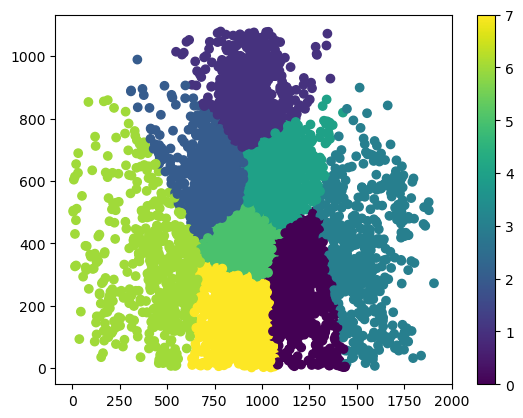

In [ ]:
plt.scatter(x=all_fixations['Fixation point X'], y=all_fixations['Fixation point Y'], c=all_fixations['centroid_id'])
plt.colorbar()
plt.show()

In [ ]:
def to_centroids(fixation_df, kmeans):
    centroid_id = kmeans.predict(fixation_df[['Fixation point X', 'Fixation point Y']])
    centroids = kmeans.cluster_centers_
    fixation_df['centroid_id'] = centroid_id
    fixation_df['centroid_x'] = [centroids[idx][0] for idx in centroid_id]
    fixation_df['centroid_y'] = [centroids[idx][1] for idx in centroid_id]
    return fixation_df

gaze_centroid_2D = to_centroids(gaze_points_2D, kmeans)
gaze_centroid_2D_control = to_centroids(gaze_points_2D_control, kmeans)

In [ ]:
all_control = []
for control in list_control:
    gaze_points_2D = get_fixation_df(data_control, control)
    gaze_centroid_2D = to_centroids(gaze_points_2D, kmeans)
    all_control.append(gaze_centroid_2D)

    '''
    plt.figure(figsize=(6,3))
    plt.plot(gaze_centroid_2D['Recording timestamp'], gaze_centroid_2D['centroid_x'], label='Centroid')
    plt.plot(gaze_centroid_2D['Recording timestamp'], gaze_centroid_2D['Fixation point X'], label='Raw data', alpha=0.8)
    plt.title('Centroid representation vs raw data')
    plt.legend()
    plt.show()
    '''
    
all_control = pd.concat(all_control)

In [ ]:
all_patient = []
for patient in list_patient:
    gaze_points_2D = get_fixation_df(data_patient, patient)
    gaze_centroid_2D = to_centroids(gaze_points_2D, kmeans)
    all_patient.append(gaze_centroid_2D)

    '''
    plt.figure(figsize=(6,3))
    plt.plot(gaze_centroid_2D['Recording timestamp'], gaze_centroid_2D['centroid_x'], label='Centroid')
    plt.plot(gaze_csentroid_2D['Recording timestamp'], gaze_centroid_2D['Fixation point X'], label='Raw data', alpha=0.8)
    plt.title('Centroid representation vs raw data')
    plt.legend()
    plt.show()
    '''

all_patient = pd.concat(all_patient)

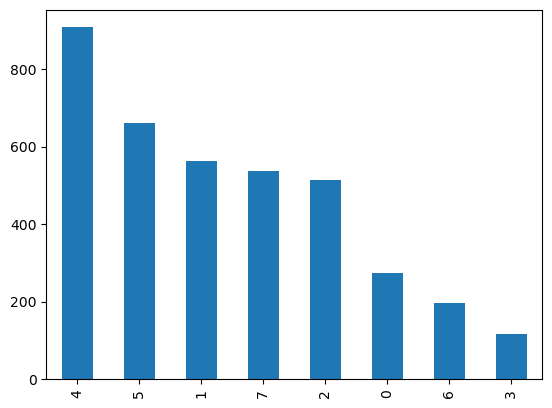

<AxesSubplot:>

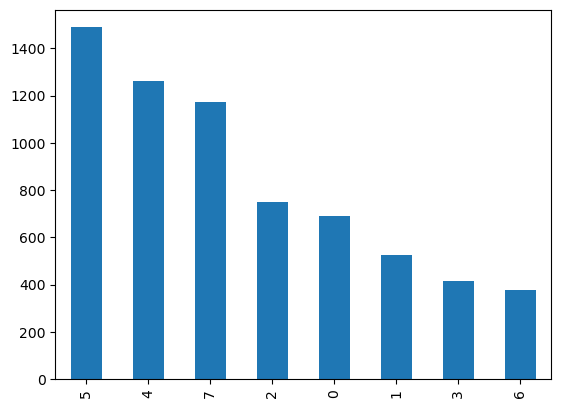

In [ ]:
all_control['centroid_id'].value_counts().plot(kind='bar')
plt.show()
all_patient['centroid_id'].value_counts().plot(kind='bar')

### Symbolization

In [221]:
import tslearn
from tslearn.piecewise import PiecewiseAggregateApproximation, SymbolicAggregateApproximation
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import roc_curve

In [222]:
patient_df = []
for name in data_patient.keys():
  patient_df.append(get_fixation_df(data_patient, name))

control_df = []
for name in data_control.keys():
  control_df.append(get_fixation_df(data_control, name))


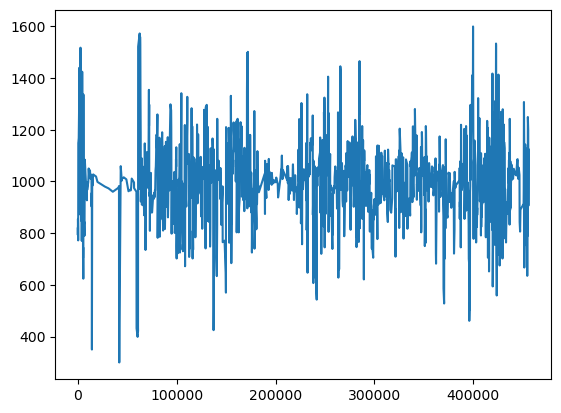

In [308]:
gaze_points_2D = get_fixation_df(data_control, list_control[3])

plt.plot(gaze_points_2D['Time'], gaze_points_2D['Fixation point X'])
plt.show()

In [318]:
# SAX transform
sax_features = []
y = []
for df in patient_df:
    dataset = np.array(df['Fixation point X']).reshape(1, -1)
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
    dataset = scaler.fit_transform(dataset)

    n_paa_segments = 50
    n_sax_symbols = 10
    sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                        alphabet_size_avg=n_sax_symbols)
    sax_dataset = sax.fit_transform(dataset)
    sax_features.append(sax_dataset)
    y.append(1)

for df in control_df:
    dataset = np.array(df['Fixation point X']).reshape(1, -1)
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
    dataset = scaler.fit_transform(dataset)

    n_paa_segments = 50
    n_sax_symbols = 15
    sax = SymbolicAggregateApproximation(n_segments=n_paa_segments,
                                        alphabet_size_avg=n_sax_symbols)
    sax_dataset = sax.fit_transform(dataset)
    sax_features.append(sax_dataset)
    y.append(0)

In [319]:
sax_features = np.array(sax_features)
sax_features = np.squeeze(sax_features)

In [320]:
# Convert sax features into an alphabet
sax_symbols = []
for i in range(sax_features.shape[0]):
    sequence = ''
    for j in range(sax_features.shape[1]):
        sequence += chr(ord('`') + sax_features[i,j])
    sax_symbols.append(sequence)


sequence_train, sequence_test, y_train, y_test = train_test_split(list(sax_symbols), y, shuffle=True, stratify=y)

In [321]:
vec = TfidfVectorizer(analyzer='char', ngram_range=(2, 4))
X_train = vec.fit_transform(sequence_train)
X_test = vec.transform(sequence_test)
X = vec.transform(sax_symbols)

In [322]:
pca = KernelPCA(n_components=3, kernel="rbf", gamma=10, alpha=0.1)
X_reduced = pca.fit_transform(X.toarray())

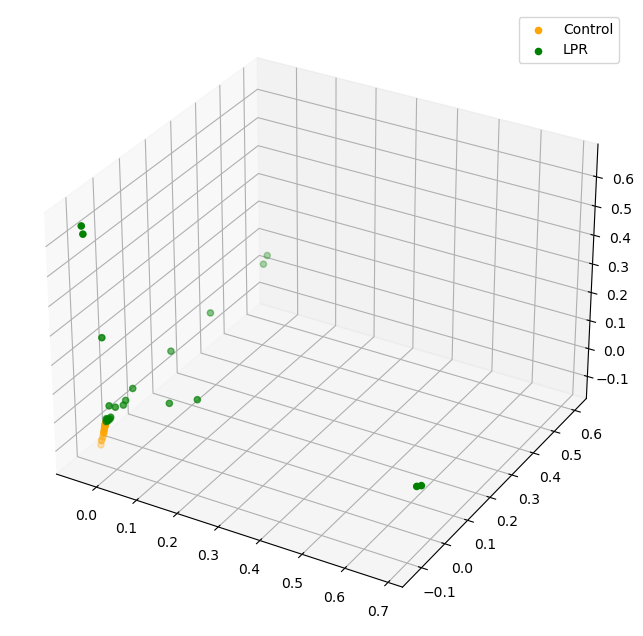

In [323]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
label_dict = ["Control","LPR"]
cdict = ['orange','green']
for label in np.unique(y):
    idx = np.where(y==label)
    ax.scatter(X_reduced[idx,0], X_reduced[idx,1], X_reduced[idx,2], c=cdict[label],label=label_dict[label])
ax.legend()
plt.show()

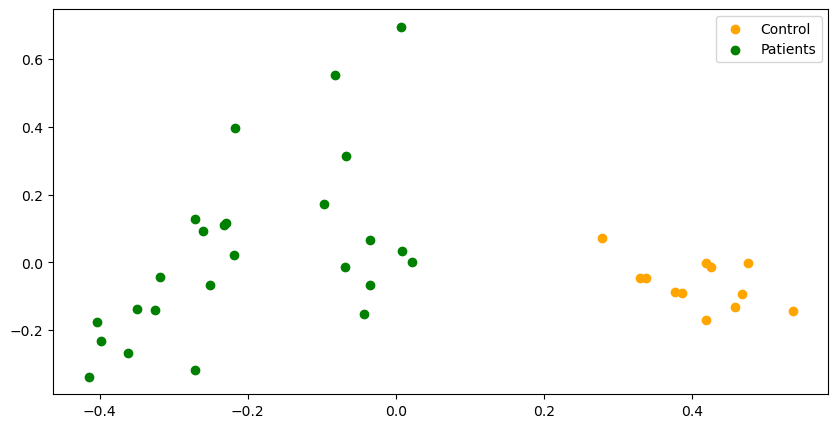

In [325]:
pca = PCA()
X_reduced = pca.fit_transform(X.toarray())

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
label_dict = ["Control","Patients"]
cdict = ['orange','green']
for label in np.unique(y):
    idx = np.where(y==label)
    ax.scatter(X_reduced[idx,0], X_reduced[idx,1], c=cdict[label],label=label_dict[label])
ax.legend()
plt.show()

In [326]:
pca.components_

array([[ 8.72894567e-03,  1.07712595e-02, -9.47777932e-04, ...,
         8.93496963e-03,  1.07712595e-02,  1.07712595e-02],
       [-3.47733582e-03, -8.04350593e-05, -3.83292926e-03, ...,
        -2.49054547e-03, -8.04350593e-05, -8.04350593e-05],
       [-1.08788944e-02,  8.85492004e-03, -2.10979358e-02, ...,
         9.36126122e-03,  8.85492004e-03,  8.85492004e-03],
       ...,
       [ 8.44835821e-04,  3.23514424e-03, -2.28437316e-03, ...,
         6.57347344e-03,  3.23514424e-03,  3.23514424e-03],
       [ 2.06660919e-03,  2.17222468e-03,  1.53519818e-04, ...,
        -1.34130170e-02,  2.17222468e-03,  2.17222468e-03],
       [-1.59252501e-01,  1.55226998e-01, -2.07549202e-01, ...,
        -4.61812801e-03, -2.26170929e-03, -1.71521253e-04]])

In [304]:
# Train a logistic regression classifier and use the classifier to
# make predictions
clf = LogisticRegression(class_weight='balanced', C=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy score : {accuracy_score(y_pred,y_test)*100:.2f}%")

Accuracy score : 100.00%


In [305]:
fpr, tpr, thresh = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

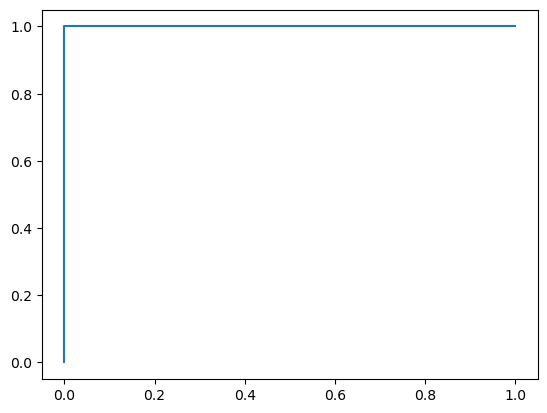

In [270]:
plt.plot(fpr, tpr)

In [271]:
clf.predict_proba(X_test)

array([[0.85467957, 0.14532043],
       [0.00934209, 0.99065791],
       [0.83397999, 0.16602001],
       [0.01038418, 0.98961582],
       [0.04920661, 0.95079339],
       [0.85350288, 0.14649712],
       [0.0324765 , 0.9675235 ],
       [0.00970681, 0.99029319],
       [0.01033771, 0.98966229],
       [0.02653669, 0.97346331]])

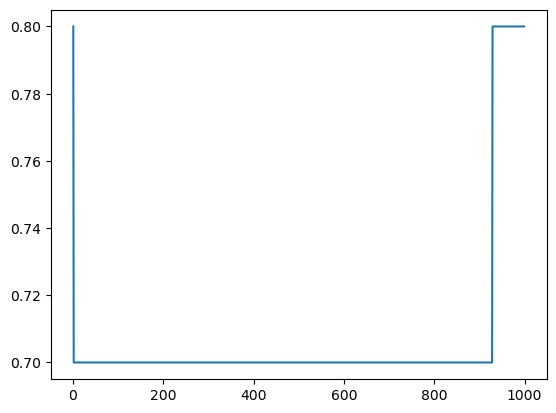

In [237]:
accs = []
Cs = range(1,1000)
for C in Cs:
    clf = LogisticRegression(class_weight='balanced', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accs.append(accuracy_score(y_pred,y_test))
plt.plot(Cs, accs)